<p style="color:#153462; 
          font-weight: bold; 
          font-size: 30px; 
          font-family: Gill Sans, sans-serif; 
          text-align: center;">
          SOM Implementation</p>

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">About Dataset</span>

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       <b>Dataset</b>: <a href="https://archive.ics.uci.edu/dataset/143/statlog+australian+credit+approval">Australian Credit Approval</a>
   </font>
</p>

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       This file contains credit card applications.  All attribute names and values have been changed to meaningless
       symbols to protect confidentiality of the data.
       This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers
       of values, and nominal(refers to categorical data that doesn't have a numerical order.) with larger numbers of values.  There are also a few missing values.
   </font>
</p>



### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Goal of the Experiment</span>

<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       Predicting group of customer who are fradulent. we are going to solve this problem in an unsupervised way.
   </font>
</p>

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Required Packages</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Load Dataset</span>

In [2]:
dataset = pd.read_csv("dataset/Credit_Card_Applications.csv")

In [3]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


<p style="text-align: justify; text-justify: inter-word;">
   <font size=3>
       <b>Class 0</b>: It represents, no fraud <br>
       <b>Class 1</b>: It represents, fraud
   </font>
</p>

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [5]:
# The values attribute returns the data in array format
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values  # We don't required them because it we are going to solve this problem in unsupervised way.

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Feature Scaling</span>

In [6]:
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]], shape=(690, 15))

In [7]:
print(f"Dataset shape with labels: ", dataset.shape)
print(f"Transformed dataset shape without labels:", X.shape)

Dataset shape with labels:  (690, 16)
Transformed dataset shape without labels: (690, 15)


### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Training the SOM</span>

In [8]:
# Initialize the SOM
som = MiniSom(x=10, y=10,       # This is the grid size which represents num of nodes (10 * 10 = 100)
              input_len=15,     # The dimensionality of the input data. This should match the number of features in your dataset.  
              sigma=1.0,        # The radius of the neighborhood function, which determines the extent of the influence a node has on its neighbors. A larger sigma means a broader area of influence.
              learning_rate=0.5 # The initial learning rate for the training process. It controls how much the weights are adjusted during each training step.
             )

In [9]:
som.random_weights_init(X)

In [10]:
# Get the weights of the first neuron (index 0)
weights_of_first_neuron = som.get_weights()[0, 0, :]
weights_of_first_neuron

array([0.48842545, 0.        , 0.11909774, 0.41071429, 0.        ,
       0.30769231, 0.25      , 0.        , 1.        , 1.        ,
       0.1641791 , 1.        , 0.5       , 0.        , 0.        ])

In [11]:
# Get the weights of the 79th neuron (index 78)
weights_of_79th_neuron = som.get_weights()[7, 8, :]
weights_of_79th_neuron

array([0.5597748 , 1.        , 0.18676692, 0.00892857, 0.5       ,
       0.15384615, 0.5       , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.5       , 0.        , 0.        ])

In [12]:
som.train_random(data=X, num_iteration=100, verbose=True)

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.5270458226222051


### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Data Visualization</span>

<p style="text-align: justify; text-justify: inter-word; font-size: 15px;">
    We are going to plot all the winning nodes in the two dimentional grid graph. In this graph we are
    primarily going to depicts Mean Interneuron Distance(MID). In simple terms, MID is the mean of
    distances of winning node with its surrounding nodes. The higher MID of the node, it more away
    from its surrounding nodes. Therefore the <b>higher MID</b> node probably an outlier.<br>
    <strong>Note</strong>: More details can be found in appendix(<a href="#Mean-Interneuron-Distance">Mean Interneuron Distance</a>) section of this notebook
</p>

In [19]:
from pylab import bone, pcolor, colorbar, plot, show

In [22]:
# This method gives the MID of each winning node
distance_map_array = som.distance_map()
print(F"Size of Map array: {len(distance_map_array)}")
print(distance_map_array)

Size of Map array: 10
[[0.26533641 0.37388772 0.38368049 0.40006919 0.44078056 0.50684323
  0.5841541  0.44028584 0.4266336  0.29943153]
 [0.47004513 0.71824714 0.62325392 0.5138725  0.67945424 0.82066296
  0.72457795 0.6940933  0.82437551 0.4584893 ]
 [0.53264687 0.86957881 0.68625129 0.65249502 0.62725574 0.57589539
  0.63286048 0.72560365 0.63304349 0.38004664]
 [0.46113292 0.72458627 0.77045755 0.69661039 0.80354796 0.62465209
  0.70590536 0.54788105 0.61612521 0.46524704]
 [0.37589469 0.62340558 0.80052801 0.65640413 0.66796273 0.68841793
  0.62800578 0.63977596 0.67954825 0.46621708]
 [0.53096479 0.51506493 0.71668287 0.71365834 0.69244802 0.74471156
  0.75430661 0.9042381  0.87180112 0.51709734]
 [0.32162768 0.75533941 0.54164132 0.65437636 0.68963475 0.60187128
  0.83073348 0.78307045 1.         0.51324182]
 [0.37331359 0.52873436 0.5836966  0.55977837 0.46282978 0.64445952
  0.7259113  0.82681654 0.77501477 0.58390033]
 [0.42746049 0.60862025 0.62190689 0.61429194 0.63309016 0

Customer data: [0.84268147 1.         0.12526316 0.40928571 0.5        0.23076923
 0.375      0.05561404 0.         0.         0.         1.
 0.5        0.05       0.01212   ]
Winning node: (np.int64(5), np.int64(8))
Customer data: [0.69609056 0.         0.13413534 0.25       0.5        0.53846154
 0.375      0.00578947 0.         0.         0.         0.
 0.5        0.08       0.        ]
Winning node: (np.int64(6), np.int64(1))


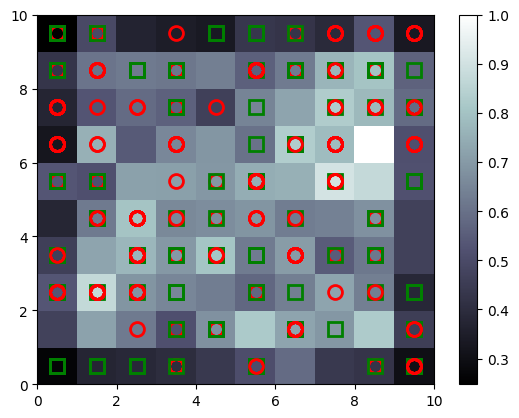

In [27]:
# NOTE:
# The graph might look different each time you run it's because
# random weights that you initialize will be different each time.
bone()

# You will get a 10 X 10 graph because our array shape is 10 X 10.
# If you are not clear about the pcolor function, read the appendix section of this notebook
pcolor(som.distance_map())

# In the generated graph white color nodes(grid) are having highest MID and dark-blue(grid) has lowest MID
# The white color nodes are potential outliers and possible representations of fraudulent customers
colorbar()

# Now we will check each winning node approved credit loan or not. For this, we are going to use
# output label
markers = ["o", "s"]
color = ["r", "g"]

count = 1
for index, customer_data in enumerate(X):
    winning_node = som.winner(customer_data)
    if count <= 2:
        print(f"Customer data: {customer_data}")
        print(f"Winning node: {winning_node}")
        count += 1
    plot(
        winning_node[0] + 0.5,  # Represent X co-ordinate and 0.5 to move marker in the center of grid
        winning_node[1] + 0.5,  # Represent Y co-ordinate and 0.5 to move marker in the center of grid
        markers[y[index]],   # If Y is 0, not a fraud and it repesented with "o", For fraudelent it is 1 and "s"
        markeredgecolor=color[y[index]],
        markerfacecolor="None",  # Some color filled inside markers if you remove this one
        markersize=10,
        markeredgewidth=2
    )

### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Finding the frauds</span>

<p style="text-align: justify; text-justify: inter-word;">
    In the above Graph, the wight grids represents potential outliers or fraudulent customers. We are going to use
    <code>som.win_map(data)</code> method to get customers associated with these white grids by looking at graph and grabing
    co-ordinates.
</p>

In [29]:
mappings = som.win_map(X)
# Example: Bring customers associated with co-ordinate (9, 1)
mappings[(9,7)]

[array([0.68839822, 1.        , 0.03639098, 0.00142857, 0.5       ,
        0.53846154, 0.375     , 0.00140351, 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.        , 0.        ]),
 array([0.57560395, 1.        , 0.2356391 , 0.04464286, 0.5       ,
        0.61538462, 0.375     , 0.06140351, 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.1       , 0.        ]),
 array([7.46509216e-01, 1.00000000e+00, 3.42105263e-01, 1.51785714e-01,
        5.00000000e-01, 7.69230769e-01, 3.75000000e-01, 1.22807018e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 2.27000000e-01, 5.00000000e-04]),
 array([0.80564132, 1.        , 0.24180451, 0.125     , 0.5       ,
        0.53846154, 0.375     , 0.00578947, 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.108     , 0.        ]),
 array([3.59389578e-01, 1.00000000e+00, 1.12781955e-01, 5.35714286e-02,
        5.00000000e-01, 6.15384615e-

In [33]:
# In the above graph, I can see (1, 1), (5, 7) and (7, 3) are fradulent. These
# might change if you run entire notebook
frauds = np.concatenate((mappings[(9, 7)],mappings[(7, 2)]), axis=0)

In [34]:
# Since our values are transformed, we should apply inverse
frauds = sc.inverse_transform(frauds)
frauds

array([[1.5737627e+07, 1.0000000e+00, 1.6170000e+01, 4.0000000e-02,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5709459e+07, 1.0000000e+00, 2.9420000e+01, 1.2500000e+00,
        2.0000000e+00, 9.0000000e+00, 4.0000000e+00, 1.7500000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.0000000e+02, 1.0000000e+00],
       [1.5752139e+07, 1.0000000e+00, 3.6500000e+01, 4.2500000e+00,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 3.5000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 4.5400000e+02, 5.1000000e+01],
       [1.5766906e+07, 1.0000000e+00, 2.9830000e+01, 3.5000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

In [35]:
frauds[0][0]

np.float64(15737627.0)

In [37]:
# he/she might be one the fradulent but accepted
dataset[dataset["CustomerID"] == 15737627.0]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
47,15737627,1,16.17,0.04,2,8,4,0.04,0,0,0,0,2,0,1,1


### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Appendix</span>

##### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Mean Interneuron Distance</span>

In Self-Organizing Maps (SOMs), **MID** stands for **Mean Interneuron Distance**.

**Here's a breakdown of what it means:**

* **Interneuron Distance:** This refers to the distance between a winning neuron (also known as the Best Matching Unit or BMU) and its neighboring neurons on the SOM grid.
* **Mean:** The average of these interneuron distances within a specified neighborhood around the winning neuron.

**Essentially, MID provides a measure of how evenly distributed the neurons are around a particular winning neuron.** A higher MID value indicates that neighboring neurons are more spread out, while a lower MID value suggests that they are more clustered together.

**Why is MID important?**

* **Visualization:** MID can be used to visualize the distribution of neurons on the SOM grid. High MID values might indicate regions of the map with fewer neurons, while low MID values might suggest areas with a higher density of neurons.
* **Analysis:** MID can be used to analyze the topology of the SOM and identify patterns or structures in the data. For example, a high MID value in a specific region might suggest that the data in that region is more diverse or less clustered.

**In summary, MID is a valuable metric for understanding the structure and organization of a SOM and can be used to gain insights into the underlying patterns and relationships within the data.**


##### <span style="color:#3C4048; font-weight: bold; font-size: 18px; font-family: Gill Sans, sans-serif;">Simple color bar demo</span>

In [14]:
import numpy as np

In [15]:
random_ints = np.array([[2, 1, 3, 6],[7,3,4,5], [2, 1, 3, 6]])
random_ints

array([[2, 1, 3, 6],
       [7, 3, 4, 5],
       [2, 1, 3, 6]])

Text(0, 0.5, 'Y-Rows')

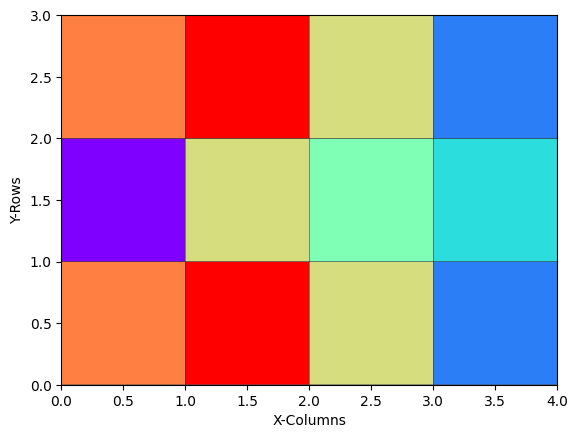

In [18]:
# Assign a color to each value, if you observe first and third rows has same
# color since I have used the same values.
plt.pcolor(random_ints, cmap='rainbow_r', edgecolors='black')
# It looks like the X-axis represents columns in the array and the Y-axis represents rows
plt.xlabel('X-Columns')
plt.ylabel('Y-Rows')